In [2]:
pip install pandas_datareader

  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_datareader import data

In [7]:
goog = data.DataReader('GOOG', start='2004', end='2016',
                        data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [8]:
goog = goog['Close']

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

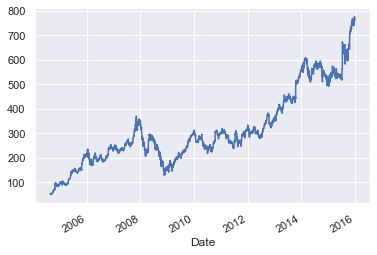

In [10]:
goog.plot()

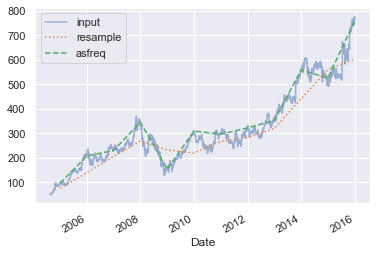

In [13]:
# resampling and converting frequencies
# resample() is a data aggregation, asfreq() is a data selection
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
            loc='upper left');

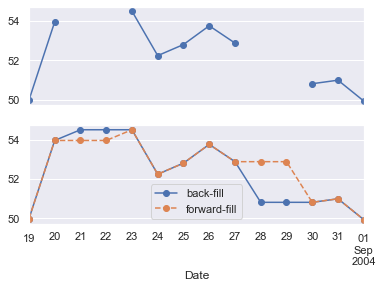

In [26]:
# resample reports the average of the previous year, while asfreq reports the value at the end of the year
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

C:\Users\huwen\.conda\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  import sys


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

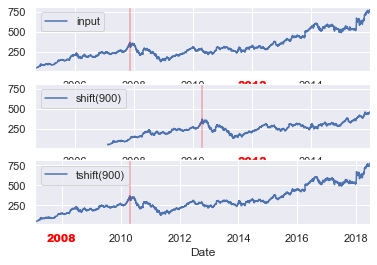

In [41]:
# time_shifts for shifting data in time 
# shift() shifts data, tshift() shifts index 
fig, ax = plt.subplots(3, sharey=True)
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

C:\Users\huwen\.conda\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


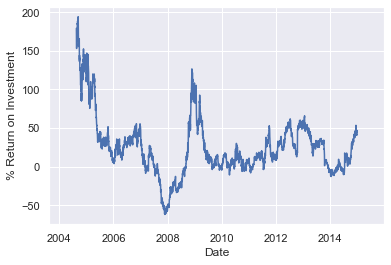

In [42]:
# tshift() used for computer the differences over time
ROI = 100* (goog.tshift(-365)/goog -1)
ROI.plot()
plt.ylabel('% Return on Investment');

<IPython.core.display.Javascript object>

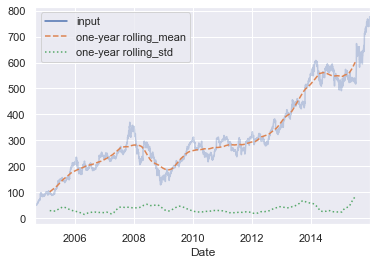

In [50]:
# ROLLING WINDOWS  for rolling statistics
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [62]:
data = pd.read_csv(r'C:\Users\huwen\Downloads\Fremont_Bridge_Bicycle_Counter.csv', index_col='Date',parse_dates=True)

<IPython.core.display.Javascript object>

In [63]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [64]:
data.columns = ['Total','East', 'West']
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [65]:
data.dropna().describe()

,Total,East,West
count,142144.000000,142144.000000,142144.000000
mean,111.101355,50.571280,60.530075
std,141.791650,65.360139,88.136627
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

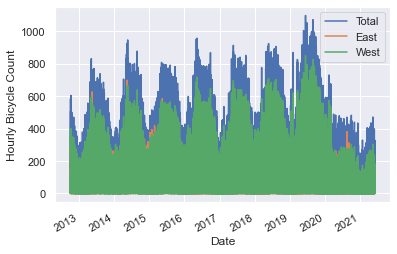

In [67]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

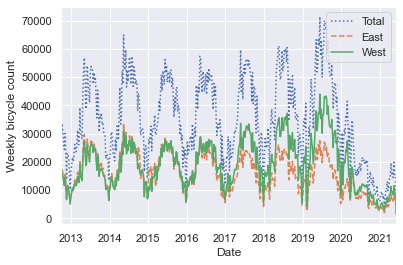

In [72]:
# let's resample by week
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

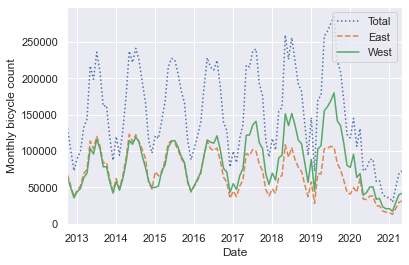

In [73]:
monthly = data.resample('M').sum()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Monthly bicycle count');

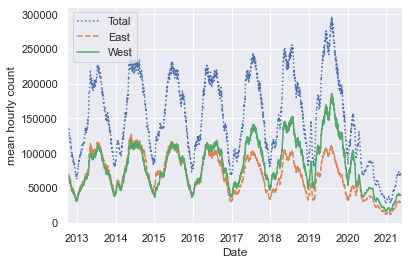

In [74]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

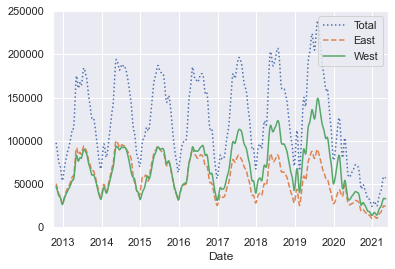

In [75]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

<IPython.core.display.Javascript object>

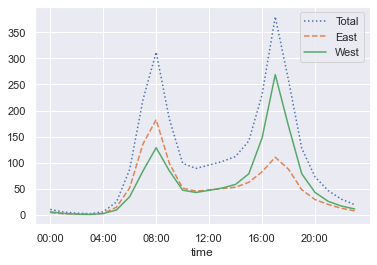

In [77]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

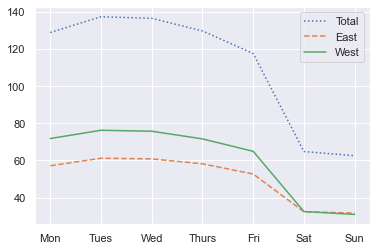

In [79]:
# by week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [82]:
# High-Performance Pandas: eval() and query()
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(100)
y = rng.rand(100)
%timeit x + y # NumPy and Pandas support fast vectorized operations can be very fast

460 ns ± 7.63 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [84]:
# but it becomes less effcient if you compute compound expression  for example mask = (x > 0.5) & (y < 0.5)
# Numexpr library allows us to compute compund expression without allocating full intermediate arrays
# import numexpr
# mask = (x > 0.5) & (y < 0.5)
# mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
# np.allclose(mask, mask_numexpr)

In [85]:
# The eval() function in Pandas uses string expressions to efficiently compute operations 
import pandas as pd
nrows, ncols = 100,100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                             for i in range(4))

In [88]:
%timeit df1 + df2 + df3 + df4

336 µs ± 17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [90]:
%timeit pd.eval('df1 + df2 + df3 + df4')

938 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [91]:
# operations supported by pd.eval()
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                                   for i in range(5))

In [93]:
# arithmetic operators
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [94]:
# Comparison operators
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [95]:
# Bitwise operators
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [104]:
# Object attributes and indices pd.eval() supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

In [105]:
# Column-Wise Operations pandas has pd.eval() , dataframe has eval(), columns can be referred by name
df = pd.DataFrame(rng.rand(3, 3), columns=['A', 'B', 'C'])
df

,A,B,C
0,0.365448,0.417880,0.050438
1,0.924268,0.088119,0.579931
2,0.871652,0.420865,0.800125


In [106]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [107]:
result3 = df.eval('(A + B) / (C - 1)') # much more succinct 
np.allclose(result1, result3)

True

In [108]:
# ASSIGNMENT IN DATAFRAME.EVAL() allows assignment to any column
df

,A,B,C
0,0.365448,0.417880,0.050438
1,0.924268,0.088119,0.579931
2,0.871652,0.420865,0.800125


In [109]:
df.eval('D = (A + B) / C', inplace=True) # add a new column
df

,A,B,C,D
0,0.365448,0.417880,0.050438,15.530606
1,0.924268,0.088119,0.579931,1.745703
2,0.871652,0.420865,0.800125,1.615393


In [110]:
df.eval('D = (A - B) / C', inplace=True) # the existing column can be modified
df

,A,B,C,D
0,0.365448,0.417880,0.050438,-1.039556
1,0.924268,0.088119,0.579931,1.441808
2,0.871652,0.420865,0.800125,0.563395


In [111]:
# DataFrame.query() Method based on evaluated strings
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result1

,A,B,C,D
0,0.365448,0.41788,0.050438,-1.039556


In [112]:
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [113]:
result2 = df.query('A < 0.5 and B < 0.5') # for this type of filtering operation, you can use the query() method
np.allclose(result1, result2)

True